# Ford GoBike - Feb/2019 Data Visualization
## by Shahenda Mahmoud

## Preliminary Wrangling

- Shows data for Ford GoBike which is around 183,412 trips, also includes data about users, stations and trips duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
fgb=pd.read_csv("fordgobike-2019.csv")

In [3]:
fgb.shape

(183412, 16)

In [4]:
fgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
fgb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

**The main structure of this data set are 16 columns and 183412 rows discribing the sharing system for ford go bike from so many aspects including the following**: 

- An ID number for each bike
- The duration of the rented bikes 
- The beginning and end stations 
- The start and end time of each trip
- The birth year  and the gender of each user
- The type of membership

### What is/are the main feature(s) of interest in your dataset?

- How long does the average trip take "Trip Duration"?
- How customers versus subscribers use the service?
- Does The age or the gender have an impact on the use of the service?
- Station with the most frequent visitors?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Trip Duration
- Membership Type
- User gender and Age
- End and Start Station

In [6]:
#Check null values for each column 
fgb.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#Check duplicates 
fgb.duplicated().sum()

0

In [8]:
#Finding how many bikes are used in the shared dataset
fgb.bike_id.nunique()

4646

## Cleaning the data set from unwanted info.

In [9]:
#Make a copy of the dataset
fgb_copy= fgb.copy()

In [10]:
#Removing unwanted columns from the dataset for better analysis
fgb_copy.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [11]:
fgb_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [12]:
fgb_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   end_station_name         183215 non-null  object 
 5   bike_id                  183412 non-null  int64  
 6   user_type                183412 non-null  object 
 7   member_birth_year        175147 non-null  float64
 8   member_gender            175147 non-null  object 
 9   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.0+ MB


In [13]:
#Delete the rows without gender or birth year or start station name or end station name
fgb_copy.dropna(subset = ['member_birth_year', 'member_gender', 'start_station_name','end_station_name'], inplace=True)

In [14]:
#Check null values for each column 
fgb_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
#Create column for user's age
fgb_copy['member_age'] = 2021-fgb_copy['member_birth_year'].astype('int')

In [16]:
fgb_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,37
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,49
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,32
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,47
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,62


In [17]:
#Find the max age 
fgb_copy['member_age'].max()

143

In [18]:
#Find the mini age
fgb_copy['member_age'].min()

20

In [19]:
#To know the max ages and the minimum ages
fgb_copy.sort_values(by=['member_age'], ascending=False)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,San Francisco Ferry Building (Harry Bridges Pl...,24th St at Bartlett St,6436,Customer,1878.0,Female,No,143
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,Bryant St at 2nd St,Grove St at Masonic Ave,6249,Subscriber,1900.0,Male,No,121
110468,257,2019-02-12 18:00:27.8220,2019-02-12 18:04:45.2460,Shattuck Ave at Telegraph Ave,34th St at Telegraph Ave,456,Subscriber,1900.0,Male,Yes,121
122194,1657,2019-02-11 12:19:26.0640,2019-02-11 12:47:03.2980,Fell St at Stanyan St,Folsom St at 3rd St,2197,Subscriber,1900.0,Male,No,121
163112,1640,2019-02-05 09:18:18.3970,2019-02-05 09:45:39.0160,Fell St at Stanyan St,Folsom St at 3rd St,2715,Subscriber,1900.0,Male,No,121
...,...,...,...,...,...,...,...,...,...,...,...
63137,1734,2019-02-20 15:29:31.0690,2019-02-20 15:58:25.5100,Webster St at O'Farrell St,Fell St at Stanyan St,4852,Customer,2001.0,Male,No,20
39355,585,2019-02-23 09:24:57.7660,2019-02-23 09:34:43.6490,Russell St at College Ave,Rockridge BART Station,1363,Subscriber,2001.0,Female,No,20
111857,828,2019-02-12 16:29:35.5160,2019-02-12 16:43:23.8030,Folsom St at 13th St,Market St at Dolores St,48,Customer,2001.0,Male,No,20
181314,630,2019-02-01 09:14:35.9980,2019-02-01 09:25:06.0120,Russell St at College Ave,Berkeley Civic Center,2263,Subscriber,2001.0,Female,No,20


In [20]:
#Collect all users of age above 90 and finding out their sum
overage = fgb_copy[fgb_copy['member_age'] > 90]
overage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1285 to 183388
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             78 non-null     int64  
 1   start_time               78 non-null     object 
 2   end_time                 78 non-null     object 
 3   start_station_name       78 non-null     object 
 4   end_station_name         78 non-null     object 
 5   bike_id                  78 non-null     int64  
 6   user_type                78 non-null     object 
 7   member_birth_year        78 non-null     float64
 8   member_gender            78 non-null     object 
 9   bike_share_for_all_trip  78 non-null     object 
 10  member_age               78 non-null     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 7.3+ KB


In [21]:
#Drop the overage rows 
fgb_copy = fgb_copy.drop(overage.index, axis=0)

In [22]:
fgb_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174874 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174874 non-null  int64  
 1   start_time               174874 non-null  object 
 2   end_time                 174874 non-null  object 
 3   start_station_name       174874 non-null  object 
 4   end_station_name         174874 non-null  object 
 5   bike_id                  174874 non-null  int64  
 6   user_type                174874 non-null  object 
 7   member_birth_year        174874 non-null  float64
 8   member_gender            174874 non-null  object 
 9   bike_share_for_all_trip  174874 non-null  object 
 10  member_age               174874 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 16.0+ MB


In [23]:
#Change start_time and end_time to datetime
fgb_copy['start_time'] = pd.to_datetime(fgb_copy['start_time'])
fgb_copy['end_time'] = pd.to_datetime(fgb_copy['end_time'])
fgb_copy = fgb_copy.sort_values(by='start_time')

In [24]:
#Change duration_sec to minutes, as the visualization will be easier to interpret
fgb_copy['duration_min']=fgb_copy['duration_sec']/60
fgb_copy['duration_min']=fgb_copy['duration_min'].astype(float)
fgb_copy['duration_sec']=fgb_copy['duration_sec'].astype(float)

In [25]:
#change duration_min to hrs, as the visualization will be easier to interpret
fgb_copy['duration_hrs'] = fgb_copy['duration_min']/60

fgb_copy['duration_hrs']=fgb_copy['duration_hrs'].astype(float)

In [26]:
#change user_type and gender to category type
fgb_copy.user_type = fgb_copy.user_type.astype('category')
fgb_copy.member_gender = fgb_copy.member_gender.astype('category')


In [27]:
fgb_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174874 entries, 183411 to 15
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174874 non-null  float64       
 1   start_time               174874 non-null  datetime64[ns]
 2   end_time                 174874 non-null  datetime64[ns]
 3   start_station_name       174874 non-null  object        
 4   end_station_name         174874 non-null  object        
 5   bike_id                  174874 non-null  int64         
 6   user_type                174874 non-null  category      
 7   member_birth_year        174874 non-null  float64       
 8   member_gender            174874 non-null  category      
 9   bike_share_for_all_trip  174874 non-null  object        
 10  member_age               174874 non-null  int64         
 11  duration_min             174874 non-null  float64       
 12  duration_hrs   

In [28]:

# extract start time weekdays only not months as the data are of one month only.
fgb_copy['start_weekday']=fgb_copy['start_time'].dt.strftime('%a')

#change data type to category
fgb_copy.start_weekday = fgb_copy.start_weekday.astype('category')

In [29]:
fgb_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hrs,start_weekday
183411,271.0,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,Spear St at Folsom St,2nd St at Folsom St,1057,Subscriber,1989.0,Male,No,32,4.516667,0.075278,Fri
183406,706.0,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,Jersey St at Church St,Folsom St at 9th St,5017,Subscriber,1988.0,Male,No,33,11.766667,0.196111,Fri
183407,480.0,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,25,8.000000,0.133333,Fri
183410,139.0,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,33,2.316667,0.038611,Fri
183408,313.0,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,37,5.216667,0.086944,Fri


In [30]:
fgb_copy['start_time'].value_counts()

2019-02-15 07:47:00.197    2
2019-02-22 20:11:42.256    2
2019-02-15 08:43:18.422    2
2019-02-11 17:05:07.840    2
2019-02-07 09:06:07.056    2
                          ..
2019-02-03 09:58:59.870    1
2019-02-16 12:13:04.646    1
2019-02-11 16:02:38.695    1
2019-02-01 11:05:42.083    1
2019-02-12 08:45:41.587    1
Name: start_time, Length: 174863, dtype: int64

##### Data Attached within the csv file is regarding February 2019

# Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.





In [31]:
fgb_copy['duration_min'].describe()

count    174874.000000
mean         11.733788
std          27.375710
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

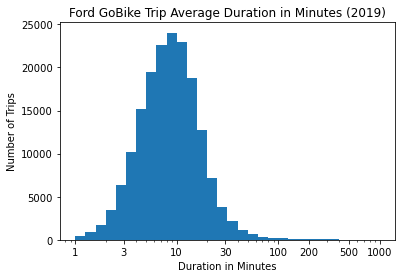

In [32]:
#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 200,500,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = fgb_copy , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in Minutes');
plt.title('Ford GoBike Trip Average Duration in Minutes (2019)');
plt.ylabel('Number of Trips');

### Ford GoBike Trips Duration:
 - with duration between 1 min to over 400 mins with the average majority of bike trips taking around 11 mins 
 - we will dig deeper to know the age of the most users and the timing of the most trips

In [33]:
fgb_copy['member_age'].describe()

count    174874.000000
mean         36.159961
std           9.967807
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          90.000000
Name: member_age, dtype: float64

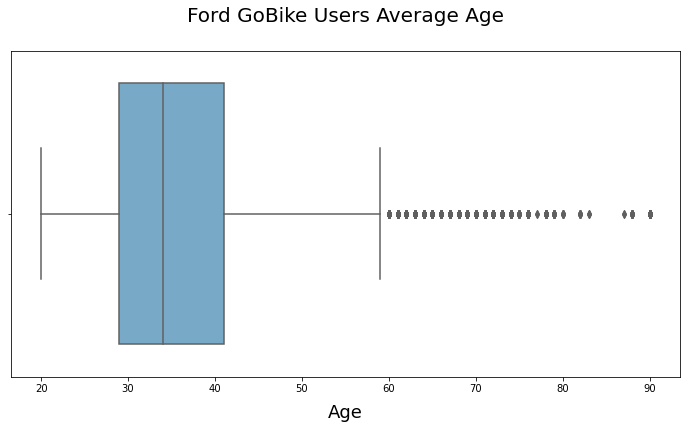

In [34]:
plt.figure(figsize=(12,6))
sb.boxplot(x='member_age', data=fgb_copy, palette='Blues')
plt.title("Ford GoBike Users Average Age", fontsize=20, y=1.07)
plt.xlabel("Age", fontsize=18, labelpad=10);

### Ford GoBike Users 
their average age of around 36 years old and after cleaning the data the oldest members are around 90 years old.

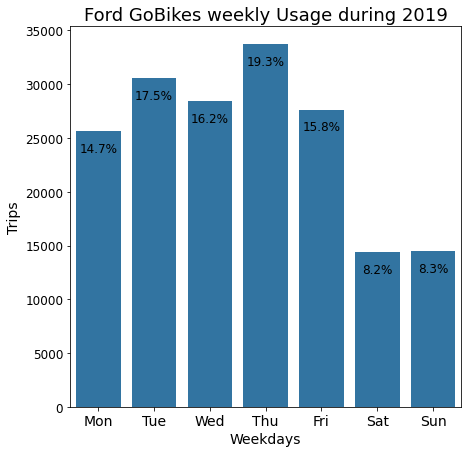

In [35]:
plt.figure(figsize=(7,7))
days_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=fgb_copy, x='start_weekday',color=sb.color_palette()[0],order=days_order);
plt.ylabel('Trips',fontsize = 14)
plt.xlabel('Weekdays',fontsize = 14)
plt.title('Ford GoBikes weekly Usage during 2019',fontsize = 18)
day_counts = fgb_copy['start_weekday'].value_counts()
total_trips= day_counts.sum()
plt.yticks(size=12); 
locs, labels = plt.xticks( size=14); 
for loc, label in zip(locs, labels):
    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_trips)
    plt.text(loc, count-1000, pct_string, ha = 'center',va='top', color = 'black',fontsize = 12)

#### Ford GoBike Week Days Usage
 - As shown within the graph above, the trips increases during the week days and drop to almost 50% down during the weekends which indicates with the age that the users of the service are using it as work trasportation 

In [36]:
#Number of used start stations 
print(len(fgb_copy['start_station_name'].value_counts()))

329


In [37]:
# finding top 10 used start stations 
fgb_copy['start_station_name'].value_counts().loc[lambda x : x>2000]


Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3406
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2709
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2572
San Francisco Ferry Building (Harry Bridges Plaza)           2540
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

In [38]:
#Number of used end stations 
print(len(fgb_copy['end_station_name'].value_counts()))

329


In [39]:
# finding top 10 used end stations
fgb_copy['end_station_name'].value_counts().loc[lambda x : x>2000]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4621
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3460
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2860
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2781
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

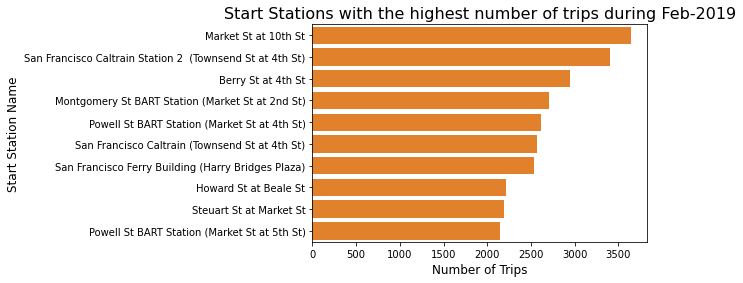

In [40]:
# Ploting start stations with the highest number of trips 
top_start_station = fgb_copy['start_station_name'].value_counts().loc[lambda x : x>2000]
start_station=top_start_station.index

base_color = sb.color_palette()[1]
sb.countplot(data=fgb_copy, y='start_station_name', color=base_color, order=start_station)
plt.xlabel('Number of Trips',fontsize=12)
plt.ylabel('Start Station Name',fontsize=12)
plt.title('Start Stations with the highest number of trips during Feb-2019',fontsize=16);

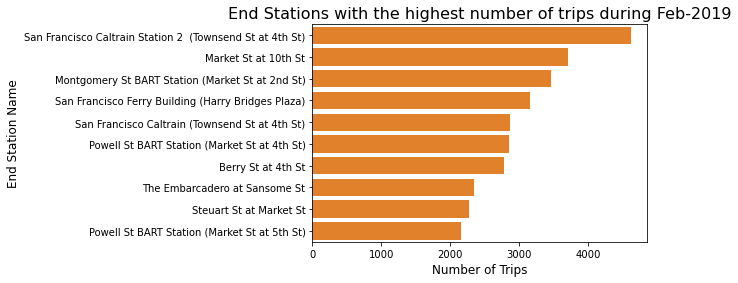

In [41]:
# Ploting End stations with the highest number of trips 
top_end_station = fgb_copy['end_station_name'].value_counts().loc[lambda x : x>2000]
end_station=top_end_station.index

base_color = sb.color_palette()[1]
sb.countplot(data=fgb_copy, y='end_station_name', color=base_color, order=end_station)
plt.xlabel('Number of Trips',fontsize=12)
plt.ylabel('End Station Name',fontsize=12)
plt.title('End Stations with the highest number of trips during Feb-2019',fontsize=16);

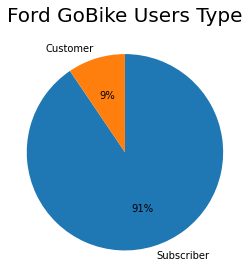

In [42]:
sub_types = fgb_copy['user_type'].value_counts()
plt.pie(sub_types, labels = sub_types.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Ford GoBike Users Type", fontsize=20, y=1.07)
plt.axis('square');

#### Ford GoBike Subscription Types:
- As shown above most of the users types  are subscriber and only 9% are customers without a subscription which is an indicator that the subscription packages are very effective and saves money 
- let's find out the gender that mostly uses the service 

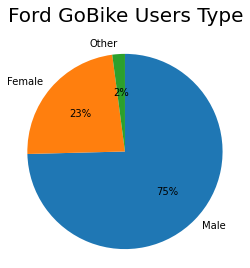

In [43]:
user_gender = fgb_copy['member_gender'].value_counts()
plt.pie(user_gender, labels = user_gender.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Ford GoBike Users Type", fontsize=20, y=1.07)
plt.axis('square');

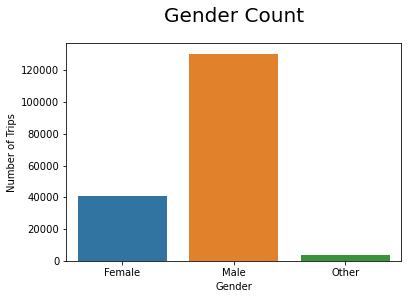

In [44]:
sb.countplot(data = fgb_copy, x = 'member_gender')
plt.title("Gender Count", fontsize=20, y=1.07)
plt.xlabel('Gender')
plt.ylabel('Number of Trips');

#### Ford GoBike Users Gender :
- As shown above are mainly males and only 23% are females 
- Males take almost 3 times the number of trips that were taken by females 
- others indicates that may be some data are missing or either they are queer 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Yes this dataset required some transformation. i needed to change some data types such as time and date.
also changing duration secs to mins and hrs inorder to be presented in more easier form to be readable 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I had to tidy the data so i performed the cleaning step earlier included finding out the users ages and removing some ages that were more than 90 years old (which seemed to be unvalid) also some data erangling were performed on the start_time and end_time to extract date, time and to find out trips were going on which days of the week. 

# Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

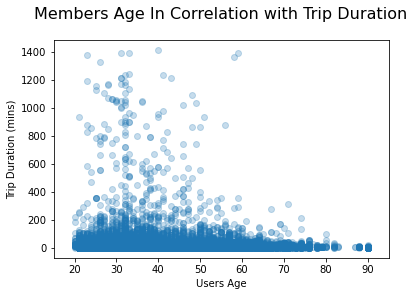

In [45]:
# a scatter plot to show the relation between age and trip duration.
plt.scatter(data=fgb_copy, x='member_age', y='duration_min', alpha=1/4)
plt.xlim(15, 95) 
plt.title("Members Age In Correlation with Trip Duration", fontsize=16, y=1.07)
plt.xlabel('Users Age')
plt.ylabel('Trip Duration (mins)');

#### Members Age Correlation with Trip Duration 
- The graph above shows that the duration increase in certain age range and lowers as we move to older ages which is very logical and resonable 

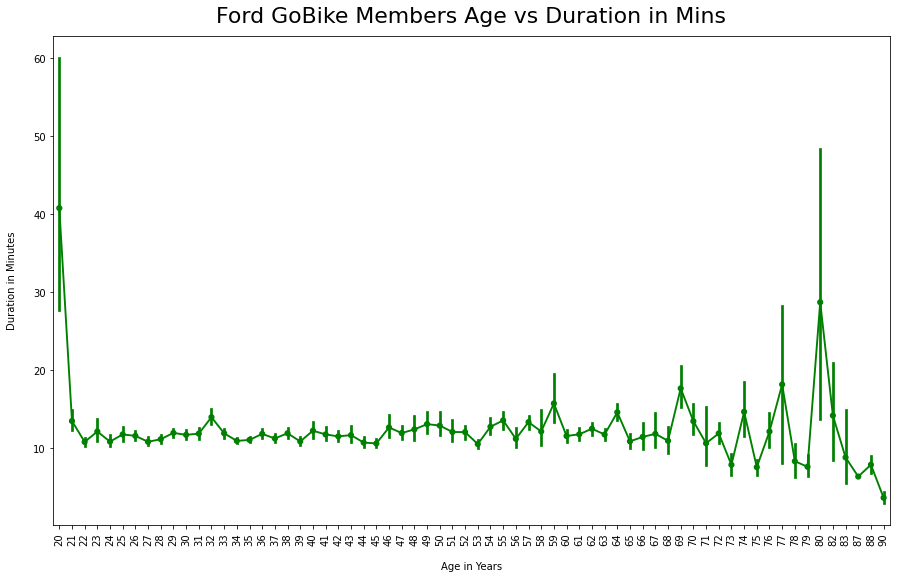

In [46]:
plt.figure(figsize=(15,9))
sb.pointplot(data = fgb_copy, x='member_age', y='duration_min', scale=.7, color='green')
plt.title('Ford GoBike Members Age vs Duration in Mins', fontsize=22, y=1.015)
plt.xlabel('Age in Years', labelpad=16)
plt.ylabel('Duration in Minutes', labelpad=16)
plt.xticks(rotation = 90);

#### Ford GoBike Members Age vs Duration in Mins
- the graph above shows how steady the trips duration is during certain age range and how it fluctates as we go older.

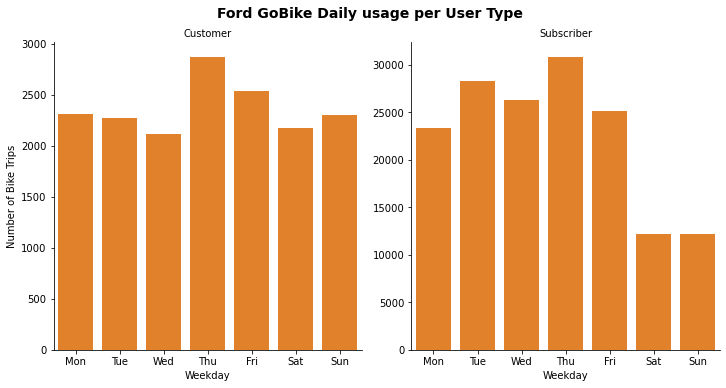

In [47]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=fgb_copy, x='start_weekday', col="user_type", kind='count', sharey = False, order = day_order, color = base_color)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Ford GoBike Daily usage per User Type', y=1.03, fontsize=14, fontweight='semibold');


#### Ford GoBike Daily Usage per User Type indication:
- The graphs above is showing and revealing data regarding the behavior of both types of users of Ford GoBike, it shows that subscribers use the service during weekdays mostly as it's their ride to work mostly and their trips drop down to around 50% less during weekends, while customers ride most equally during all weekdays and even weekends except for thursday it has the most number of trips which gives an indication that customers use bikes on an occasional basis for something unusual in their schedule.

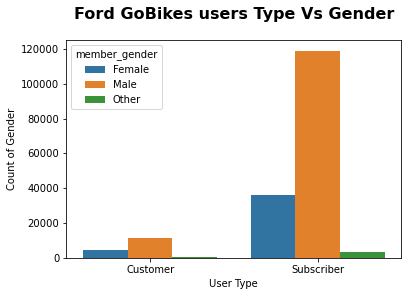

In [48]:
sb.countplot(data=fgb_copy, x='user_type', hue='member_gender')
plt.title('Ford GoBikes users Type Vs Gender', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Count of Gender')
plt.show()

#### Ford GoBikes users Type Vs Gender
- The graph above shows that in both types of users the male gender is more dominating in the usage of the service.

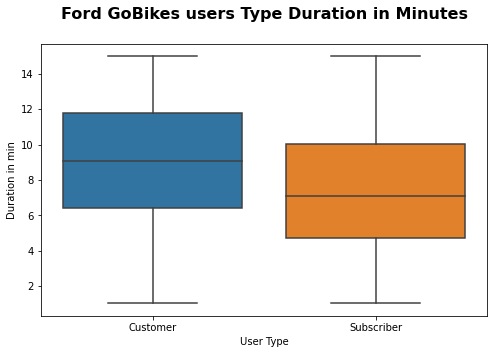

In [49]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = fgb_copy.query('duration_min < 15'), x = 'user_type', y = 'duration_min')
plt.title('Ford GoBikes users Type Duration in Minutes', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration in min')
plt.show()

#### Ford GoBikes users Type Duration in Minutes
- The graph above shows the trip duration each type of user mostly consume, the plot highlights that Customers normally have longer trip durations. Customers normally ride between 6 to 12 mins when Subscriber trips are normally shorter and last anywhere between 5 to 10 mins.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Time: Most of trips are during the weekdays than in weekends. However, the cutomers type of users are a bit different in this observation and they use the service during weekends as well as weekdays
- Age: most of users are between 30 and 40 years old. which indicates that most users are of a full time job and they are employees
- Gender: the number of trips in males is way more than the number in females. It needs to be investigated more to know why is the service prefered from one gender than the other.
- Subscribe: the number of trips in subscribers is more than the number in customers which maybe a result of packages and pricing system.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The greatest fluctuation between the shorest and longest rides is with the older users which may indicate that the performance of the users is decreasing with age.
- Negative correlation between age of the users and number of trips 

# Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [50]:
#keeping the dataset of only top start stations. 
locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St',
'Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)', 'San Francisco Caltrain (Townsend St at 4th St)',             
'San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St' ,'Steuart St at Market St' ,'Powell St BART Station (Market St at 5th St) ']
fgb_stat =fgb_copy.loc[fgb_copy['start_station_name'].isin(locs)]

In [51]:
# (1) Top Start stations by days: separate user types and take a look customers and subscribers individually
fgb_cust = fgb_stat.query('user_type == "Customer"')

In [52]:
fgb_sub = fgb_stat.query('user_type == "Subscriber"')

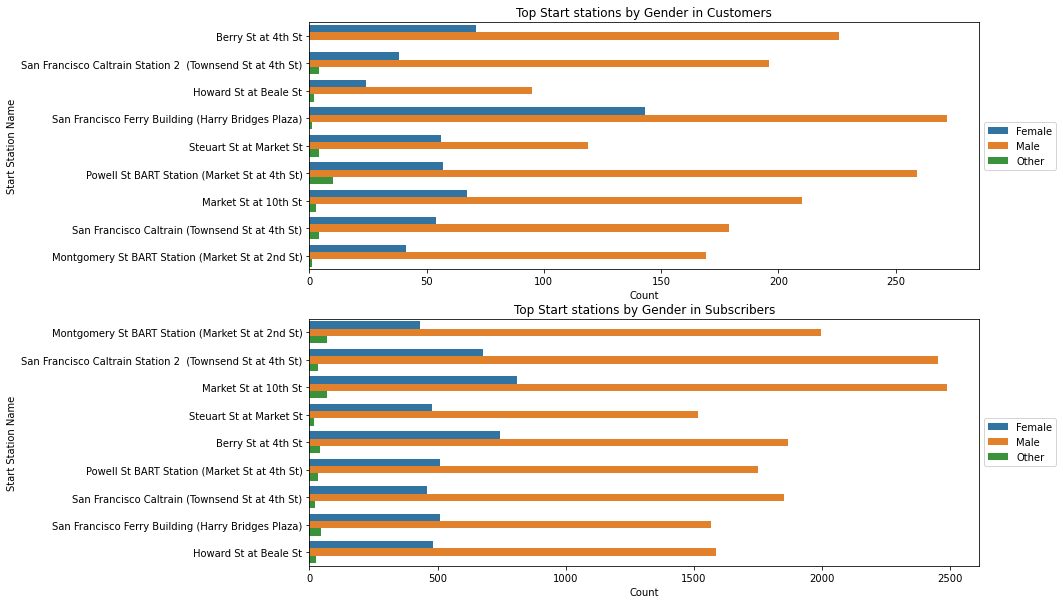

In [53]:
# 1. 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=fgb_cust, y='start_station_name', hue='member_gender')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top Start stations by Gender in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=fgb_sub, y='start_station_name', hue='member_gender')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top Start stations by Gender in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

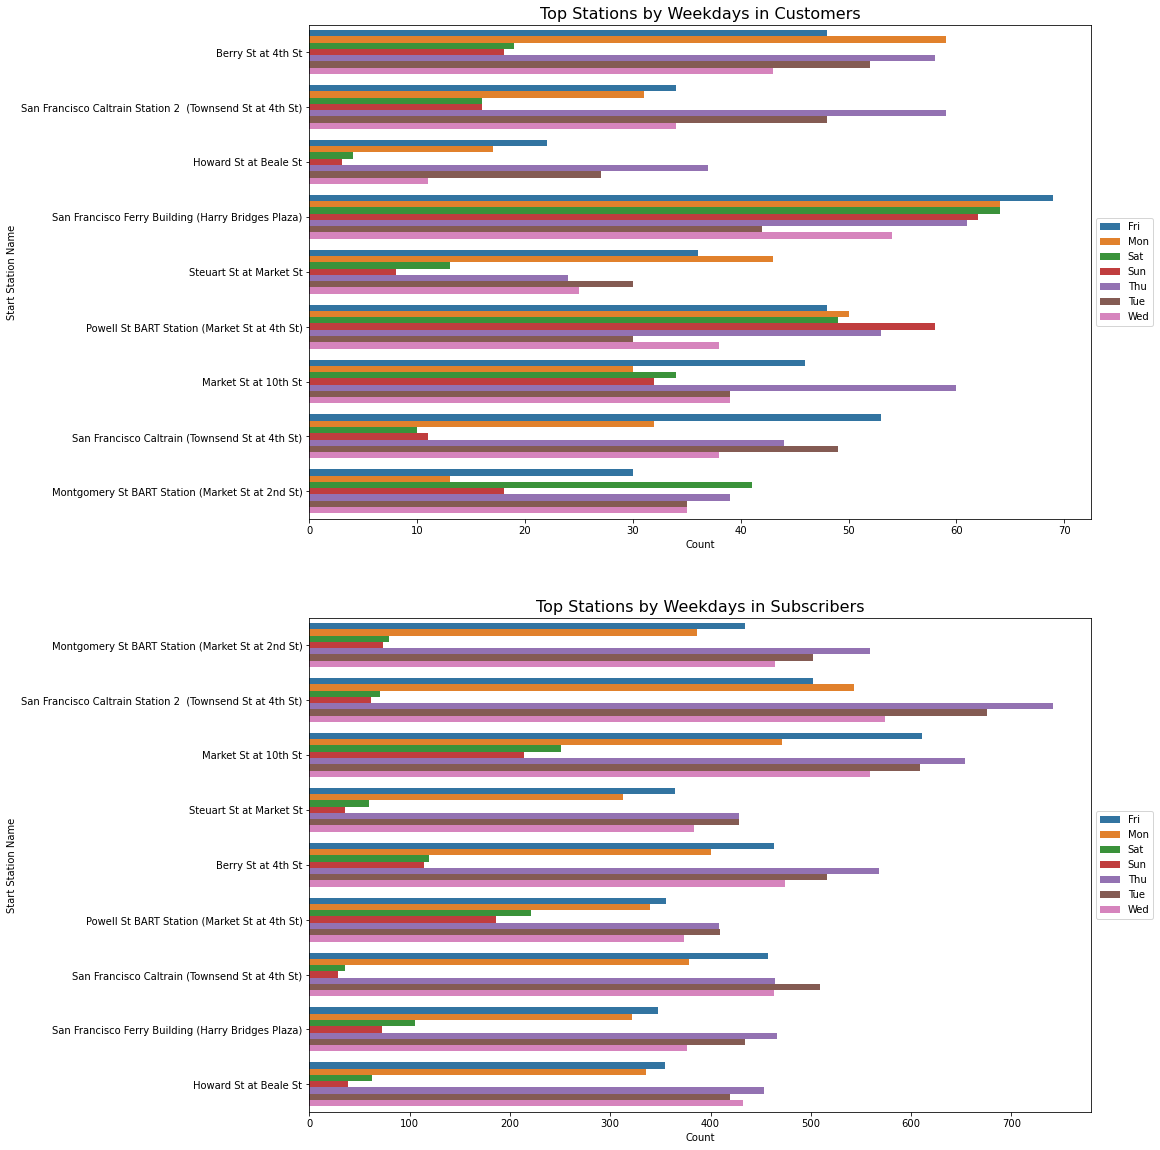

In [54]:
# 2. 3 categorical variables using countplot: Weekday between customers and subscribers
plt.figure(figsize=(14,20))
ax = plt.subplot(211)
sb.countplot(data=fgb_cust, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top Stations by Weekdays in Customers',fontsize=16)
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=fgb_sub, y='start_station_name', hue='start_weekday')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top Stations by Weekdays in Subscribers',fontsize=16)
plt.ylabel('Start Station Name')
plt.xlabel('Count');

#### Ford GoBike Stations Analysis:
- after dividing the data according to Customers and Subscribers according to the top start stations used we found out that during weekdays customers type is equally using the service during all weekdays and this indicates that probably customers may include tourists because  trips doesn't have an outstanding pattern. On the other hand, subscribers indicates that most of them are empolyees because most trips happen in the weekdays.
- on analysing the Customers and Subscribers gender most of the gender in both types are males.

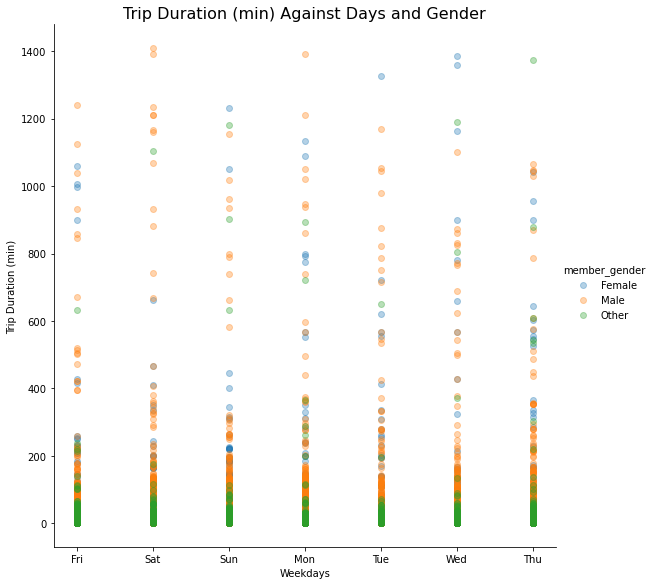

In [55]:
# Finding out how the average trip time is affected by gender and Weekdays.
g = sb.FacetGrid(data =  fgb_copy, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'start_weekday','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration (min) Against Days and Gender', fontsize= 16)
plt.xlabel('Weekdays')
plt.ylabel('Trip Duration (min)');

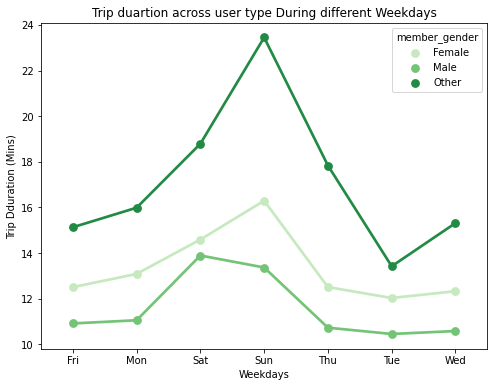

In [56]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = fgb_copy, x = 'start_weekday', y = 'duration_min', hue = 'member_gender', palette = 'Greens', ci=None)
plt.title('Trip duartion across user type During different Weekdays')
plt.ylabel('Trip Dduration (Mins)')
plt.xlabel('Weekdays')
plt.show();

#### Trip Duration (min) Against Days and Gender:

- As shown within the two graphs above females takes longer trip duration than males which may give us an indicator that males have a better fitness and cycling performance 

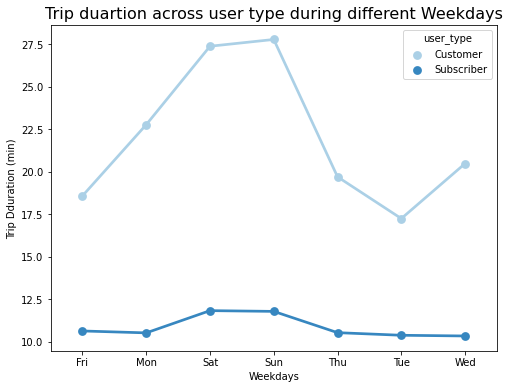

In [57]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = fgb_copy, x = 'start_weekday', y = 'duration_min', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type during different Weekdays',fontsize=16)
plt.ylabel('Trip Dduration (min)')
plt.xlabel('Weekdays')
plt.show();

#### Trip duartion across user type during different Weekdays:
- The graph above indicates that most of the Customers users may be tourist because of the longer trip duration during weekends, and on the other hand the Subscribers users have very steady trip duration during middle weekdays and only it changes during weekends, which give us an indication that they use the service as work transportation. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The multivariate charts confirmed the earlier relationships that were observed. The customers prefer to use the Ford GoBike on weekends, and the subscribers use the service on during weekdays, the most. This was not influenced by gender.

### Were there any interesting or surprising interactions between features?

- Female members has much higher trip duration than Males,which may give us an indicator that males have a better fitness and cycling performance. 
- The customer has higher trip duration than subscriber in avarage.
- The subscriber is far less active than the customer during weekends.
- The Others Gender have the most outliner data.

## Links and references used during the analysis
- https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column
- https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
- https://matplotlib.org/stable/tutorials/text/text_props.html
- https://re-thought.com/pandas-value_counts/


In [60]:
#creating a csv file of the cleaned data frame 
fgb_copy.to_csv('fgb_2019_clean.csv', index=None)